### MC Dataset

In [1]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('dark_background')

In [2]:
def simple_monte_carlo(S, K, T, r, q, sigma, CallPut, n, m):
    '''
    Simple Monte Carlo option pricing algorithm for European Calls and Puts with Euler discretization
    
    Args:
        S - Initial Stock Price         sigma - Volatility
        K - Strike Price                CallPut - Option type specification (Call or Put)
        T - Time to Maturity            n - number of time steps for each MC path
        r - Risk-free interest rate     m - number of simulated paths
        q - Dividend rate
        
    Returns the simulated price of a European call or put with standard deviation and standard error
    associated with the simulation
    '''
    
    def path_sim(mu, sigma, T, S, N, M):
        '''Simulates M paths of Geometric Brownian Motion with N time steps'''
        sims = np.zeros(M) 
        dt = T/N

        for i in range(M):
            W = [0] + np.random.standard_normal(size=N)
            sims[i] = np.sum(W) * np.sqrt(dt) # We only are concerned with the terminal value for European options
        
        St = S * np.exp((mu - 0.5 * sigma ** 2) * T + sigma * sims)     
        return St
   
    paths = path_sim(r-q, sigma, T, S, n, m)
    
    # print("paths:", paths)
    
    if CallPut == 'Call':
        paths = paths - K
        paths[paths < 0] = 0    
    
    elif CallPut == 'Put':
        paths = K - paths
        paths[paths < 0] = 0
    
    c_hat = np.mean(paths) * np.exp(-r * T)
         
    return c_hat

In [3]:
# Parameters

SAMPLES_COUNT = 1000
BINS_COUNT = 100


# Fixed

T = time_to_maturity = 1
n = time_steps_count = 10
m = paths_count = 10

q = dividend_rate = 0.05
r = risk_free_interest_rate = 0.02

K = strike_price = 1000

CallPut = option_type = 'Call'

# Ranges

S = initial_stock_prices = np.linspace(0, 9900, 100).astype('int16')

sigmas = volatilities = np.linspace(0, .99, 10).astype('float32')


# Sampling

SAMPLES_COUNT = 10000
PROBABILITIES_COUNT = 100

In [ ]:
# Run MC


option_prices_shape = len(initial_stock_prices), len(volatilities)

option_prices_meshgrid = np.zeros(option_prices_shape)

option_prices = []


for i, initial_stock_price in enumerate(initial_stock_prices):
    
    print("initial_stock_price:", initial_stock_price)
    
    for j, volatility in enumerate(volatilities):
        
        print("volatility:", volatility)
        
        sample_option_prices = []
        
        for sample_index in range(SAMPLES_COUNT):
        
            sample_option_price = simple_monte_carlo(
                S=initial_stock_price, 
                K=strike_price,
                T=time_to_maturity, 
                r=risk_free_interest_rate,
                q=dividend_rate, 
                sigma=volatility, 
                CallPut=option_type, 
                n=time_steps_count,
                m=paths_count
            )
            
            sample_option_prices.append(sample_option_price)    
        
        # Option price histogram
        
        samples_per_bin, bin_edges = np.histogram(sample_option_prices, bins=PROBABILITIES_COUNT)
        
        bin_width = bin_edges[1] - bin_edges[0]

        bin_centers = bin_edges[:-1] + bin_width / 2
        
        probabilities = samples_per_bin / SAMPLES_COUNT

        # print("sample_option_prices:", sample_option_prices)
        # print("bin_centers:", bin_centers)
        # print("probabilities:", probabilities, probabilities.sum())
        # print()
        
        for option_price, probability in zip(bin_centers, probabilities):
        
            row = (initial_stock_price, volatility, option_price, probability)
        
            option_prices.append(row)
            
        # Meshgrid data
            
        average_option_price = sum(sample_option_prices) / len(sample_option_prices)

        option_prices_meshgrid[i, j] = average_option_price
        

columns = ['initial_stock_price', 'volatility', 'option_price', 'probability']        
        
option_prices_df = pd.DataFrame(option_prices, columns=columns)

# Print

# print(sample_option_prices)

initial_stock_price: 0
volatility: 0.0
volatility: 0.11
volatility: 0.22
volatility: 0.33


In [5]:
# p = option_prices_df[option_prices_df.volatility > 0.9][option_prices_df.initial_stock_price == 1100].probability.to_numpy()

In [ ]:
# Plot data

plt.contourf(initial_stock_prices, 
             volatilities,
             option_prices_meshgrid.T,
             levels=100)

plt.xlabel('Initial Stock Price')
plt.ylabel('Volatility')

plt.colorbar()
plt.show()

In [ ]:
option_prices_df[:-10]

In [7]:
option_prices_df.shape

(100000, 4)

In [8]:
import numpy as np

from matplotlib import pyplot as plt

from matplotlib import animation
from matplotlib.animation import PillowWriter

In [101]:
# Data

data_range = np.linspace(-1, 1, 100)
x, y = np.meshgrid(data_range, data_range)

results =  x ** 2 + x * y

/home/mohor/.local/lib/python3.8/site-packages/matplotlib/animation.py:887: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you have outputted the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


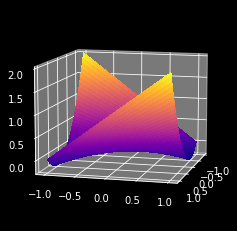

In [102]:
# 3D Animated Plot

FRAMES_COUNT = 10

ROTATION_PERIOD = 10

ELEVATION = 10


azimuth_step = 360 // FRAMES_COUNT

frames_per_second = FRAMES_COUNT // ROTATION_PERIOD


plt.style.use('dark_background')

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

ax.plot_surface(x, y, results,
                cmap='plasma',
                linewidth=0, 
                antialiased=False)

ax.view_init(elev=ELEVATION, azim=15)


def animate(frame_index):
    
    azimuth = frame_index * azimuth_step
    
    ax.view_init(elev=ELEVATION, azim=azimuth)
    
    
ani = animation.FuncAnimation(fig, animate, 
                              frames=FRAMES_COUNT, 
                              interval=50)

plt.show()

In [103]:
# Show inline

from IPython.display import HTML

HTML(ani.to_jshtml())

In [104]:
# Save to GIF

# ani.save('images/animation.gif', writer='pillow', fps=frames_per_second, dpi=100)

### Option Prices - 3D Animated Plot

In [25]:
import numpy as np

from matplotlib import pyplot as plt

from matplotlib import animation
from matplotlib.animation import PillowWriter

In [26]:
# Data

initial_stock_prices_grid, volatilities_grid = np.meshgrid(initial_stock_prices, volatilities)

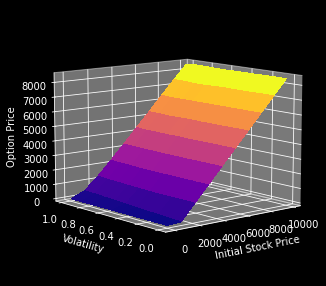

In [27]:
# 3D Animated Plot

FRAMES_COUNT = 120

ROTATION_PERIOD = 10

ELEVATION = 10

INITIAL_AZIMUTH = 230


azimuth_step = 360 // FRAMES_COUNT

frames_per_second = FRAMES_COUNT // ROTATION_PERIOD


plt.style.use('dark_background')

fig, ax = plt.subplots(figsize=(5, 5),
                       subplot_kw={"projection": "3d"})

surface = ax.plot_surface(initial_stock_prices_grid,
                          volatilities_grid,
                          option_prices_meshgrid.T,
                          cmap='plasma',
                          linewidth=30, 
                          antialiased=False)

ax.view_init(elev=ELEVATION, azim=INITIAL_AZIMUTH)


# ax.locator_params(axis='x', nbins=5)

ax.zaxis.set_rotate_label(False)

ax.set_xlabel('Initial Stock Price')
ax.set_ylabel('Volatility')
ax.set_zlabel('Option Price', rotation=90)

# ax.set_zlim(0, 20000)


def animate(frame_index):
    
    azimuth = frame_index * azimuth_step + INITIAL_AZIMUTH
    
    ax.view_init(elev=ELEVATION, azim=azimuth)
    
    
ani = animation.FuncAnimation(fig, animate, 
                              frames=FRAMES_COUNT, 
                              interval=50)

plt.show()

In [28]:
# # Show inline

# from IPython.display import HTML

# HTML(ani.to_jshtml(fps=frames_per_second))

In [45]:
# # Save to GIF

# ani.save('images/option_prices.gif', writer='pillow', fps=frames_per_second, dpi=100)

In [9]:
# # Save dataset

# DATASET_FILE = '/mnt/c/Users/mohor/Jupyter/cuquantumdemo/finance/simulated_prices/option_probabilities_100k.xlsx'

# option_prices_df.to_excel(DATASET_FILE, index=False)